<img src="uga.jpg" style="width:100px;height:100/">

# <div align="center"> <font color=red> Projet Finale: Machine Learning </font>

## <div align="center"> "Et si c'était possible de prédire à quelqu'un de ne pas se présenter à un rendez-vous?"

 # Objectif:
 
-Comprendre du mieux possible nos données

-Prédire si une perssone soit présente à son rendez-vous ou non

-Améliorer le score

## Fait par:
    -Ramdé Ismaïl  
    -N'doye EL Hadrami
    -Rizki Chaimaa
    -Heddia Bilel

## Bibliotheques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
data1 = pd.read_csv("data/KaggleV2-May-2016.csv")
df1 = data1.copy()

## Sommaire:

### 1° Analyse et exploration de données

#### 1-A) Analyse de la fome
-Variable target:No-Show 

-lignes et colones

-Analyse des variable manquantes 

####  1-B) Analyse de fond:
 -Visualisation de la target
 
 -signification des variables
 
 -Relation entre les variable et la target
 

### 2° Pré-Traitement

### 3° Modélisation

## 1-A) Analyse de la forme

D'aprés l'énoncé , notre variable target est 'No-show' car c'est la variable qui nous indique si la personne était présente le jour de son rendez-vous ou pas.

**Dimension**

In [3]:
df1.shape

(110527, 14)

**Types des variables**

In [4]:
df1.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
df1.dtypes.value_counts()

int64      8
object     5
float64    1
dtype: int64

**Remarque**:

On a 9 variables quantitatives et 5 variables qualitatives dont 8 variables de type 'entier', 5 variables de type 'object' et une variable de type 'float'.

**Déscription**

In [6]:
df1.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Quelques lignes de nos données**

In [7]:
df1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Analyse des valeurs manquantes:**

In [8]:
print("le nombre de valeurs manquantes dans chaque variable  est :\n " ,df1.isna().sum())


le nombre de valeurs manquantes dans chaque variable  est :
  PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


**Remarque:** Notre jeu de données ne contient pas de valeurs manquantes.

## 1-B) Analyse de fond:

**Elimination des variables qui sont sans intéret pour notre analyse**

In [9]:
df1.drop(['PatientId','AppointmentID'],axis=1, inplace = True)

**Visualitation de la target:**

In [10]:
df1['No-show'].value_counts() #compter le nombre de chaque catégorie

No     88208
Yes    22319
Name: No-show, dtype: int64

In [11]:
df1['No-show'].value_counts(normalize=True) #pourcentage

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

**Remarque**: On a donc presque 80% des gens qui respectent leurs rendez-vous et 20% qui ne les respectent pas.

### signification des variables

In [12]:
df1['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

**Remarque:** On remarque que d'une part  la variable 'Age'  contient des valeurs négatives  notamment '-1' et d'autre part une valeur égale à 115 qui s'écarte fortement des autres(il n'éxiste pas des valeurs intermediaires entre 102 et 115).

Ces valeurs aberrantes pourraient biaiser nos résultats, pour ce faire nous avons décidé de les supprimer.

In [13]:
#suppression des valeurs aberrantes:
df1 = df1[(df1['Age'] < 115) & (df1['Age'] > 0)]
df1['Age'].describe()

count    106982.000000
mean         38.312501
std          22.460622
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         102.000000
Name: Age, dtype: float64

In [14]:
#le nombre de rendez-vous par jour
AppointmentDay = df1.AppointmentDay.value_counts()
AppointmentDay

2016-06-06T00:00:00Z    4528
2016-05-16T00:00:00Z    4448
2016-05-30T00:00:00Z    4359
2016-06-08T00:00:00Z    4356
2016-05-09T00:00:00Z    4352
2016-06-01T00:00:00Z    4351
2016-05-11T00:00:00Z    4347
2016-06-07T00:00:00Z    4264
2016-05-12T00:00:00Z    4233
2016-05-17T00:00:00Z    4227
2016-05-18T00:00:00Z    4220
2016-05-02T00:00:00Z    4214
2016-06-02T00:00:00Z    4204
2016-05-10T00:00:00Z    4177
2016-05-31T00:00:00Z    4158
2016-05-03T00:00:00Z    4129
2016-05-05T00:00:00Z    4113
2016-05-19T00:00:00Z    4107
2016-05-04T00:00:00Z    4048
2016-06-03T00:00:00Z    3977
2016-05-13T00:00:00Z    3885
2016-05-24T00:00:00Z    3876
2016-05-06T00:00:00Z    3791
2016-05-25T00:00:00Z    3768
2016-05-20T00:00:00Z    3707
2016-04-29T00:00:00Z    3104
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

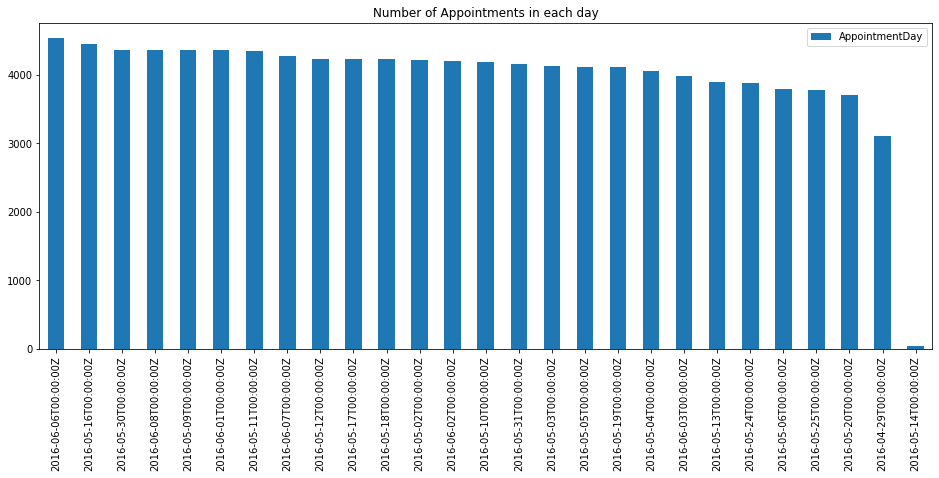

In [15]:
# Affichage du nombre de rendez-vous par jour
pd.DataFrame(AppointmentDay).plot(kind='bar',figsize=(16,6))
plt.title('Number of Appointments in each day')
plt.show()

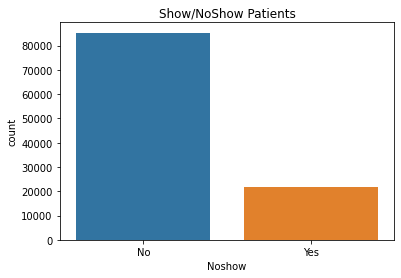

In [16]:
#Visualisation du nombre de patients en fonction de Présence/absence aux rendez-vous
df1= df1.rename(columns={'No-show': 'Noshow'})
ax = sns.countplot(x=df1.Noshow, data=df1)
ax.set_title("Show/NoShow Patients")
plt.show()

**Correction des fautes d'orthographe**

In [17]:
df1.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap',}, inplace = True)
df1.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Relation variables / Target variable:**

**Visualitation d'absence/présence en fonction de la variable sexe**

<AxesSubplot:xlabel='Gender', ylabel='count'>

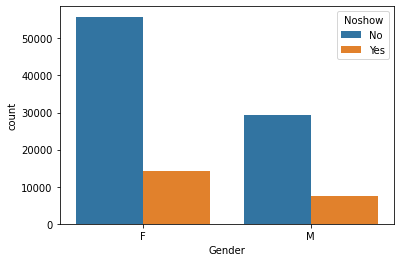

In [18]:
sns.countplot(x='Gender', hue='Noshow', data=df1) 

D'après le graphe on remarque que les femmes sont moins absentes que les hommes.

**Visualitation d'absence/présence en fonction de la variable Neighbourhood**

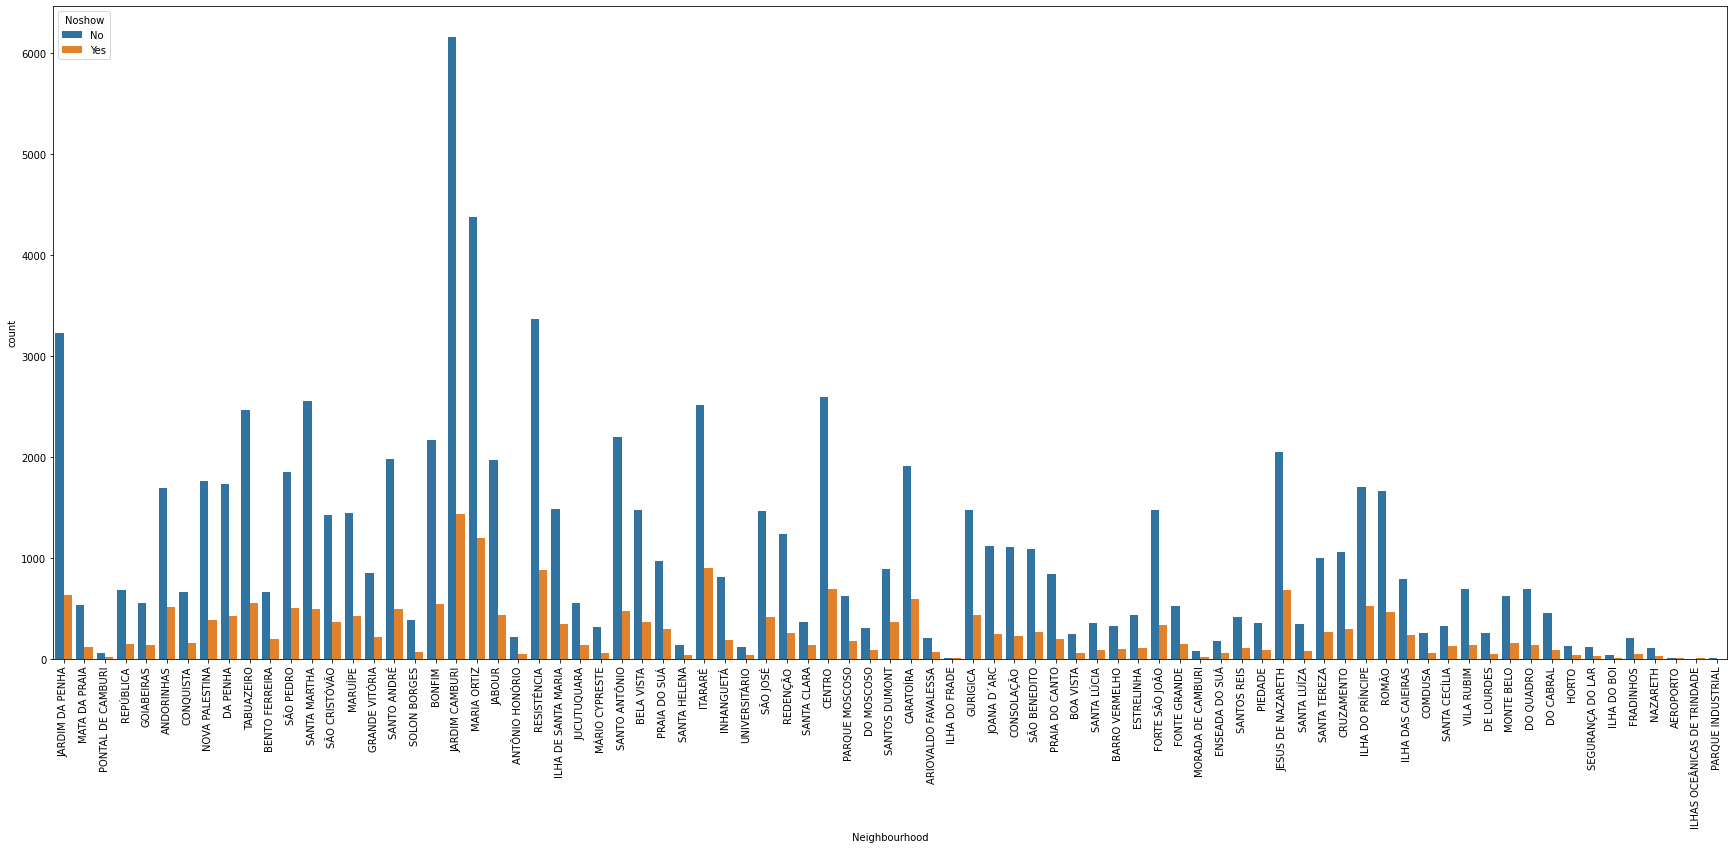

In [19]:
plt.figure(figsize=(30,12))
fig = sns.countplot(x='Neighbourhood',hue='Noshow',data=df1)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);  

Les gens de 'JARDIM CAMBURI' sont moins absents que les autres .

**Visualitation d'absence/présence en fonction de la variable Age**

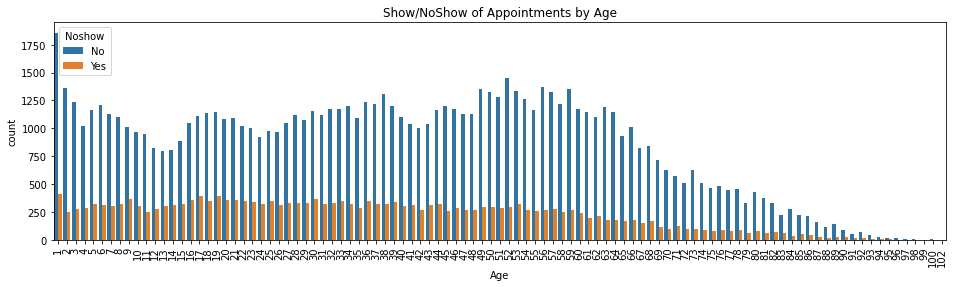

In [20]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df1.Age, hue=df1.Noshow)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

Les personnes plus agées sont les plus absencentes. 

**Visualitation d'absence/présence en fonction de la variable scholarship**

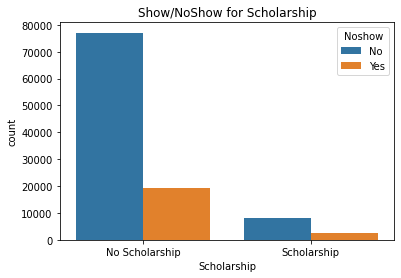

In [21]:
ax = sns.countplot(x=df1.Scholarship, hue=df1.Noshow, data=df1)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

les gens qui ne sont pas boursiers sont les moins absents.

**Visualitation d'absence/présence en fonction de la variable Hypertension**

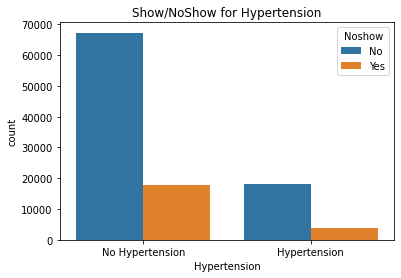

In [22]:
ax = sns.countplot(x=df1.Hypertension, hue=df1.Noshow, data=df1)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

les gens qui n'ont pas d'Hypertension sont les moins absents.

**Visualitation d'absence/présence en fonction de la variable  Diabetes**

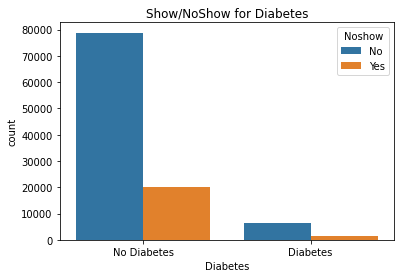

In [23]:
ax = sns.countplot(x=df1.Diabetes, hue=df1.Noshow, data=df1)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

les gens qui n'ont pas du diabetes sont les moins absents.

**Visualitation d'absence/présence en fonction de la variable   Alcoholism**

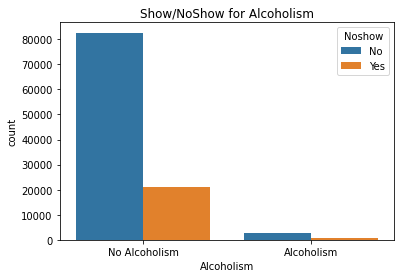

In [24]:
ax = sns.countplot(x=df1.Alcoholism, hue=df1.Noshow, data=df1)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

les gens qui ne sont pas alcoliques sont les moins absents.

**Visualitation d'absence/présence en fonction de la variable   Handicap**

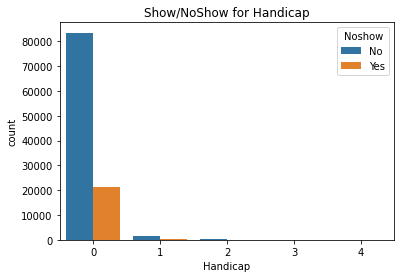

In [25]:
ax = sns.countplot(x=df1.Handicap, hue=df1.Noshow, data=df1)
ax.set_title("Show/NoShow for Handicap")
plt.show()

les gens qui ne sont pas handicaps sont les moins absents.

**Visualitation d'absence/présence en fonction de la variable   SMS_received**

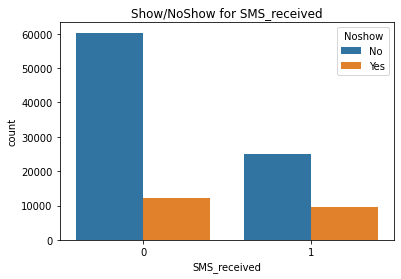

In [26]:
ax = sns.countplot(x=df1.SMS_received, hue=df1.Noshow, data=df1)
ax.set_title("Show/NoShow for SMS_received")
#x_ticks_labels=['No SMS_received', 'SMS_received']
#ax.set_xticklabels(x_ticks_labels)
plt.show()

les gens qui ne reçoit pas des SMS sont les moins absents.

#### Création des sous enssemble show et no-show

In [27]:
df1[df1['Noshow']=='No'].count()

Gender            85305
ScheduledDay      85305
AppointmentDay    85305
Age               85305
Neighbourhood     85305
Scholarship       85305
Hypertension      85305
Diabetes          85305
Alcoholism        85305
Handicap          85305
SMS_received      85305
Noshow            85305
dtype: int64

In [28]:
df1[df1['Noshow']=='Yes'].count()

Gender            21677
ScheduledDay      21677
AppointmentDay    21677
Age               21677
Neighbourhood     21677
Scholarship       21677
Hypertension      21677
Diabetes          21677
Alcoholism        21677
Handicap          21677
SMS_received      21677
Noshow            21677
dtype: int64

## 2° Pré-Traitement:

**Traintest/testset**

Nous divisons notre data frame en deux parties:
    - la première (train set) sera utilisée pour entrainer le model
    - la seconde (test set) pour tester le model. Elle représente 25% de la data frame.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
trainset, testset= train_test_split(df1,test_size=0.25, random_state=0)

In [31]:
trainset['Noshow'].value_counts()

No     63995
Yes    16241
Name: Noshow, dtype: int64

In [32]:
testset['Noshow'].value_counts()

No     21310
Yes     5436
Name: Noshow, dtype: int64

**Encodage**

Nous transformons aussi les "Gender" et "Noshow" initialement qualitatives en variables quantitatives ("0" et "1").

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])
df1['Neighbourhood'] = le.fit_transform(df1['Neighbourhood'])
df1['Noshow'] = le.fit_transform(df1['Noshow']) 
df1.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0


<AxesSubplot:>

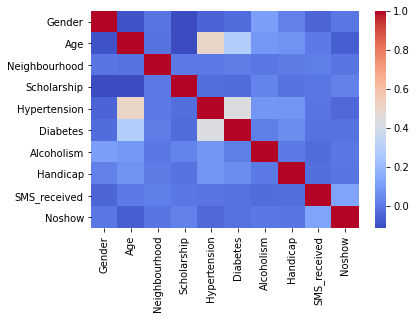

In [34]:
sns.heatmap(df1.corr(), cmap='coolwarm')

ce graphe illustre la corrélation entre la variable 'Noshow' et toutes les autres variables.

on constate que les variables 'SMS_received','Gender' et 'scholarship' sont plus corrélées à la variable 'Noshow' que toutes les autres variables.

## Modellisation:

**Méthode de classification:**

Avant tout nous commençons par sélectionner les variables d'intérêt. 
Ainsi nous supprimons de notre data frame les varibles "ScheduledDay", "AppointmentDay" et "Neighbourhood".

In [35]:
new_data = df1.drop(["ScheduledDay","AppointmentDay"],axis=1)
y = new_data['Noshow']
x = new_data.drop('Noshow', axis=1)
new_data.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,0,62,39,0,1,0,0,0,0,0
1,1,56,39,0,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0,0


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model = KNeighborsClassifier()

In [38]:
model.fit(x,y)
model.score(x,y)

0.8084257164756689

Cette première méthode classique affiche un score de 0.8084257164756689.

Même si ce score est élevé, il n’est pas fiable car nous avons entraînés et testé le modèle sur la même data frame.

**Division de la data frame**

Pour obtenir des résultats fiables nous allons diviser la data frame en deux parties.:
- le train set qui nous permettra d'entrainer le modèle
- le test set pour tester le modèle

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# division de la data en modele d'entrainement et modele de test (20%)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
model1 = KNeighborsClassifier()

In [81]:
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.7713698181988129

On obtient un score de 0.7637519278403514.

Dans la suite nous utiliserons la méthode de cross validation.
Elle nous permettra d'améliorer le score afin d'obtenir des résultats beaucoup plus précis.

**Méthode de Cross Validation**

La crosse validation consiste a diviser notre train set en 5 splits (cv=5) ensuite on fait varier le model sur un vecteur de nombre de voisin (n_neighbors) allant de 1 à 25 (n).
En fin sur un graphe on illustre les moyennes des différents scores en fonction des voisins.

In [44]:
from sklearn.model_selection import validation_curve

/home/ismael/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


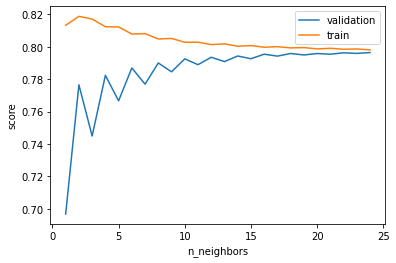

In [45]:
model = KNeighborsClassifier()

n = np.arange(1,25)
train_score, val_score = validation_curve(model, x_train, y_train, 'n_neighbors', n, cv=5)

plt.plot(n, val_score.mean(axis=1), label='validation')
plt.plot(n, train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

On remarque que la prediction est bonne à partir du nombre de voisin égale à 25 et n'évolue plus après.

Méthode avec train set et test set n_neighbors = 25

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
model2 = KNeighborsClassifier(25)

model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.7988970416413516

Le score est quasiment égal à 80%.

**Méthode régression logistique**

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model3 = LogisticRegression(solver="liblinear")
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.7987100995466654

**Exemples de prediction**

**Prédiction avec le modèle 1 :**

In [82]:
def predict(model1,Gender=1,Age = 62,Neighbourhood = 39,Scholarship = 1,Hypertension = 1 , Diabetes = 0,Alcoholism = 1,Handicap = 0,SMS_received = 0):
        x = np.array([Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received]).reshape(1,9)
        print(model1.predict(x))
        print(model1.predict_proba(x))

In [83]:
predict(model1)

[0]
[[0.8 0.2]]


**Prédiction avec le modèle 2 :**

In [84]:
def predict(model2,Gender=1,Age = 62,Neighbourhood = 39,Scholarship = 1,Hypertension = 1 , Diabetes = 0,Alcoholism = 1,Handicap = 0,SMS_received = 0):
        x = np.array([Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received]).reshape(1,9)
        print(model2.predict(x))
        print(model2.predict_proba(x))

In [85]:
predict(model2)

[0]
[[0.92 0.08]]


**Prédiction avec le modèle 3 :**

In [86]:
def predict(model3,Gender=1,Age = 62,Neighbourhood = 39,Scholarship = 1,Hypertension = 1 , Diabetes = 0,Alcoholism = 1,Handicap = 0,SMS_received = 0):
        x = np.array([Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received]).reshape(1,9)
        print(model3.predict(x))
        print(model3.predict_proba(x))

In [87]:
predict(model3)

[0]
[[0.83033379 0.16966621]]


En somme, on obtient de meilleurs résultats avec la prédiction du modèle 2.
L'individu dans notre exemple va donc se présenter avec un probabilité égale à 0,96.